In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\vinic\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\vinic\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [11]:
omegas = np.array([100,400,900,1600,2500])

Vs = []
ias = []
ids = []
data = pd.read_csv(f'Sheet1.dat',sep='	')
for u in omegas:
    V = data[f'{u}RPM'].values
    ia = data[f'{u}RPM.1'].values
    id = data[f'{u}RPM.2'].values

    Vs.append(V)
    ias.append(ia)
    ids.append(id)




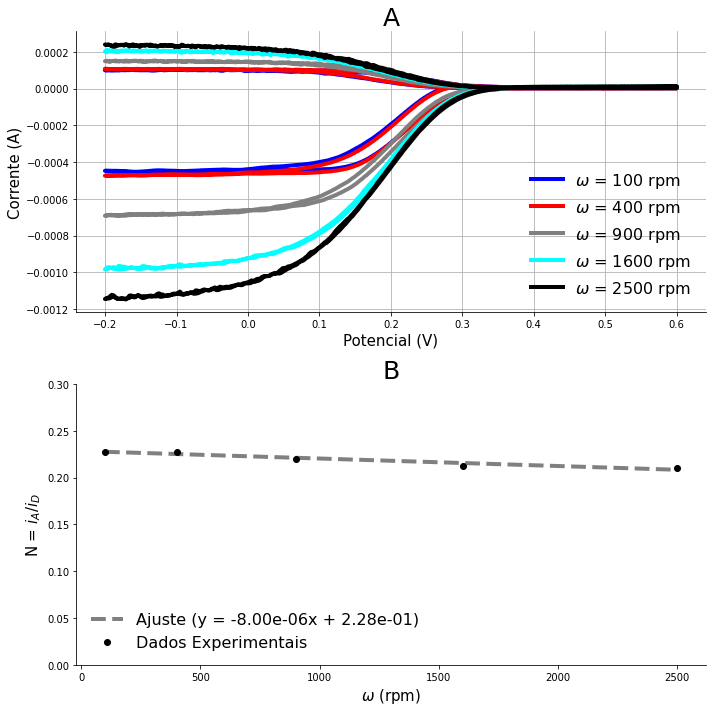

In [39]:
# Plotagem do ajuste polinomial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

COLORS = ['blue','red','gray','cyan','black']
i_max= []

for u in range(len(omegas)):
    V = np.array(Vs[u])
    ia = np.array(ias[u])
    id = np.array(ids[u])
    ax1.plot(V, ia, lw=4, label=f'$\\omega$ = {omegas[u]} rpm',color= COLORS[u])
    ax1.plot(V, id, lw=4,color = COLORS[u])
    i_max.append( max(abs(id))/max(abs(ia)) )

    #adicionar cursor para adicionar cada um dos limites de difusão

ax1.set_ylabel('Corrente (A)',fontsize=15)
ax1.set_xlabel('Potencial (V)',fontsize = 15)
ax1.grid(True)
ax1.legend(loc='lower right', frameon=False,fontsize=16)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_title('A',fontsize=25)


degree = 1  # Grau do polinômio
coeffs1 = np.polyfit(omegas, i_max, degree)
x_range = np.linspace(99,2500,100)
y_fit_ox = np.polyval(coeffs1, x_range)
ax2.plot(x_range, y_fit_ox, '--', color='gray',lw = 4, label=f'Ajuste (y = {coeffs1[0]:.2e}x + {coeffs1[1]:.2e})')

ax2.plot(omegas, i_max, 'o', color='black',label='Dados Experimentais')

ax2.set_ylabel('N = $i_{A}/i_{D}$',fontsize = 15)
ax2.set_xlabel('$\\omega$ (rpm)',fontsize = 15)
ax2.legend(loc ='lower left' ,frameon=False,fontsize=16)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.set_title('B',fontsize=25)
ax2.set_ylim(0,0.3)

plt.tight_layout()
plt.savefig('RRDE_dados.png',dpi=300)

In [40]:
print(np.mean(i_max))
print(np.sqrt(np.std(i_max)))

0.21957785312791023
0.08465115726271592
